<a href="https://colab.research.google.com/github/valeriamedina2/Extracci-n-de-caracter-sticas2/blob/main/ACTIVIDAD_5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Extacccion de caracteristicas**

In [157]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
from seaborn import load_dataset
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [159]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving microretailer_mit_lift_lab.xlsx to microretailer_mit_lift_lab (3).xlsx


{'microretailer_mit_lift_lab.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [168]:
#Carga desde un archivo .xlsx sin indice
df= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [169]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [170]:
#Imprimo los primeros 5 registro del dataframe
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


#Filtrar las primeras 9 columnas

In [171]:
df2= df.iloc[:, [0, 2, 3,5,6,100,101,102,103]]
df2

,_record_id,_server_updated_at,_updated_by,_latitude,_longitude,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name
0,dff2998e-af74-4de6-8efd-488aca24e67b,2022-11-12 22:15:10 UTC,Salomon Abdala Perez,19.053536,-98.233822,NaN,no,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,19.053561,-98.234142,NaN,no,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,19.058655,-98.232300,NaN,no,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,19.059293,-98.233158,NaN,no,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,2022-11-12 22:15:08 UTC,Salomon Abdala Perez,19.059585,-98.233864,NaN,no,NaN,NaN
...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,2022-11-03 16:50:48 UTC,Emilio Garza,19.043115,-98.194066,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,2022-11-03 16:28:15 UTC,Emilio Garza,19.042794,-98.193802,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,2022-11-03 16:28:14 UTC,Emilio Garza,19.042809,-98.193439,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,2022-11-03 16:18:37 UTC,Francisco Adán,19.042558,-98.193818,NaN,NaN,NaN,NaN


##Valores nulos

In [172]:
#Identificar los valores nulos por columna 
valores_nulos= df2.isnull().sum()
valores_nulos

_record_id                                          0
_server_updated_at                                  0
_updated_by                                         0
_latitude                                           0
_longitude                                          0
267_technology_investment_customer_preferences    101
234_willingness_participate_workshop               73
318_shopkeeper_name                               123
319_shopkeepers_last_name                         125
dtype: int64

In [173]:
df2 =df2.fillna(0)
df2

,_record_id,_server_updated_at,_updated_by,_latitude,_longitude,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name
0,dff2998e-af74-4de6-8efd-488aca24e67b,2022-11-12 22:15:10 UTC,Salomon Abdala Perez,19.053536,-98.233822,0,no,0,0
1,c596412f-4fc2-4983-acba-d9565859e42f,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,19.053561,-98.234142,0,no,0,0
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,19.058655,-98.232300,0,no,0,0
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,19.059293,-98.233158,0,no,0,0
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,2022-11-12 22:15:08 UTC,Salomon Abdala Perez,19.059585,-98.233864,0,no,0,0
...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,2022-11-03 16:50:48 UTC,Emilio Garza,19.043115,-98.194066,0,0,0,0
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,2022-11-03 16:28:15 UTC,Emilio Garza,19.042794,-98.193802,0,0,0,0
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,2022-11-03 16:28:14 UTC,Emilio Garza,19.042809,-98.193439,0,0,0,0
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,2022-11-03 16:18:37 UTC,Francisco Adán,19.042558,-98.193818,0,0,0,0


In [174]:
#Verificamos que no haya  valores nulos 
valores_nulos= df2.isnull().sum()
valores_nulos

_record_id                                        0
_server_updated_at                                0
_updated_by                                       0
_latitude                                         0
_longitude                                        0
267_technology_investment_customer_preferences    0
234_willingness_participate_workshop              0
318_shopkeeper_name                               0
319_shopkeepers_last_name                         0
dtype: int64

#Metodo de desviacion estandar

In [175]:
df2

,_record_id,_server_updated_at,_updated_by,_latitude,_longitude,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name
0,dff2998e-af74-4de6-8efd-488aca24e67b,2022-11-12 22:15:10 UTC,Salomon Abdala Perez,19.053536,-98.233822,0,no,0,0
1,c596412f-4fc2-4983-acba-d9565859e42f,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,19.053561,-98.234142,0,no,0,0
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,19.058655,-98.232300,0,no,0,0
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,19.059293,-98.233158,0,no,0,0
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,2022-11-12 22:15:08 UTC,Salomon Abdala Perez,19.059585,-98.233864,0,no,0,0
...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,2022-11-03 16:50:48 UTC,Emilio Garza,19.043115,-98.194066,0,0,0,0
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,2022-11-03 16:28:15 UTC,Emilio Garza,19.042794,-98.193802,0,0,0,0
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,2022-11-03 16:28:14 UTC,Emilio Garza,19.042809,-98.193439,0,0,0,0
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,2022-11-03 16:18:37 UTC,Francisco Adán,19.042558,-98.193818,0,0,0,0


In [176]:
num_df=df2.drop(['_record_id','_server_updated_at','_updated_by','267_technology_investment_customer_preferences','234_willingness_participate_workshop','318_shopkeeper_name','319_shopkeepers_last_name'], axis=1)
num_df

,_latitude,_longitude
0,19.053536,-98.233822
1,19.053561,-98.234142
2,19.058655,-98.232300
3,19.059293,-98.233158
4,19.059585,-98.233864
...,...,...
166,19.043115,-98.194066
167,19.042794,-98.193802
168,19.042809,-98.193439
169,19.042558,-98.193818


In [177]:
cuali=df2.drop(['_latitude'	,'_longitude'], axis=1)
cuali

,_record_id,_server_updated_at,_updated_by,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name
0,dff2998e-af74-4de6-8efd-488aca24e67b,2022-11-12 22:15:10 UTC,Salomon Abdala Perez,0,no,0,0
1,c596412f-4fc2-4983-acba-d9565859e42f,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,0,no,0,0
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,0,no,0,0
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,0,no,0,0
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,2022-11-12 22:15:08 UTC,Salomon Abdala Perez,0,no,0,0
...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,2022-11-03 16:50:48 UTC,Emilio Garza,0,0,0,0
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,2022-11-03 16:28:15 UTC,Emilio Garza,0,0,0,0
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,2022-11-03 16:28:14 UTC,Emilio Garza,0,0,0,0
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,2022-11-03 16:18:37 UTC,Francisco Adán,0,0,0,0


In [178]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=num_df
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido _latitude     19.111172
_longitude   -98.090304
dtype: float64
Limite inferior permitido _latitude     18.979439
_longitude   -98.347635
dtype: float64


In [179]:
#Encontramos Outliers del Dataframe
outliers= num_df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,_latitude,_longitude
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
166,NaN,NaN
167,NaN,NaN
168,NaN,NaN
169,NaN,NaN


In [180]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= num_df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,_latitude,_longitude
0,19.053536,-98.233822
1,19.053561,-98.234142
2,19.058655,-98.232300
3,19.059293,-98.233158
4,19.059585,-98.233864
...,...,...
166,19.043115,-98.194066
167,19.042794,-98.193802
168,19.042809,-98.193439
169,19.042558,-98.193818


In [181]:
#Corroboramos valores nulos del dataframe4
valores_nulos=num_df.isnull().sum()
valores_nulos

_latitude     0
_longitude    0
dtype: int64

In [182]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=num_df.copy()
data_clean=data_clean.fillna(round(num_df.mean(),1))
data_clean

,_latitude,_longitude
0,19.053536,-98.233822
1,19.053561,-98.234142
2,19.058655,-98.232300
3,19.059293,-98.233158
4,19.059585,-98.233864
...,...,...
166,19.043115,-98.194066
167,19.042794,-98.193802
168,19.042809,-98.193439
169,19.042558,-98.193818


In [183]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

_latitude     0
_longitude    0
dtype: int64

In [184]:
# Unimos los datas con el dataframe
limpios_desv = pd.concat([num_df,cuali], axis=1)
limpios_desv

,_latitude,_longitude,_record_id,_server_updated_at,_updated_by,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name
0,19.053536,-98.233822,dff2998e-af74-4de6-8efd-488aca24e67b,2022-11-12 22:15:10 UTC,Salomon Abdala Perez,0,no,0,0
1,19.053561,-98.234142,c596412f-4fc2-4983-acba-d9565859e42f,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,0,no,0,0
2,19.058655,-98.232300,5bb632b3-41b5-4fb6-a817-b564e8b45a48,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,0,no,0,0
3,19.059293,-98.233158,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,0,no,0,0
4,19.059585,-98.233864,6cc637fa-3d54-48c7-9499-6de13d0a26aa,2022-11-12 22:15:08 UTC,Salomon Abdala Perez,0,no,0,0
...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,2413f06e-15cc-4a6f-8e83-5224c6824b12,2022-11-03 16:50:48 UTC,Emilio Garza,0,0,0,0
167,19.042794,-98.193802,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,2022-11-03 16:28:15 UTC,Emilio Garza,0,0,0,0
168,19.042809,-98.193439,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,2022-11-03 16:28:14 UTC,Emilio Garza,0,0,0,0
169,19.042558,-98.193818,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,2022-11-03 16:18:37 UTC,Francisco Adán,0,0,0,0


In [185]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=limpios_desv.isnull().sum()
valores_nulos

_latitude                                         0
_longitude                                        0
_record_id                                        0
_server_updated_at                                0
_updated_by                                       0
267_technology_investment_customer_preferences    0
234_willingness_participate_workshop              0
318_shopkeeper_name                               0
319_shopkeepers_last_name                         0
dtype: int64

##PROCEDIMIENTO CUANTILES PARA SUSTITUIR OUTLIERS EN DATAFRAME

In [186]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=num_df

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido _latitude     19.138774
_longitude   -98.075320
dtype: float64
Limite inferior permitido _latitude     18.950047
_longitude   -98.355995
dtype: float64


In [187]:
#Encontramos Outliers del Dataframe
outliers_iqr= num_df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,_latitude,_longitude
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
166,NaN,NaN
167,NaN,NaN
168,NaN,NaN
169,NaN,NaN


In [188]:
#Obtenemos datos limpios del Dataframe
data3_iqr= num_df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,_latitude,_longitude
0,19.053536,-98.233822
1,19.053561,-98.234142
2,19.058655,-98.232300
3,19.059293,-98.233158
4,19.059585,-98.233864
...,...,...
166,19.043115,-98.194066
167,19.042794,-98.193802
168,19.042809,-98.193439
169,19.042558,-98.193818


In [189]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=num_df.isnull().sum()
valores_nulos

_latitude     0
_longitude    0
dtype: int64

In [190]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=num_df.copy()
data5_iqr=data5_iqr.fillna(round(num_df.mean(),1))
data5_iqr

,_latitude,_longitude
0,19.053536,-98.233822
1,19.053561,-98.234142
2,19.058655,-98.232300
3,19.059293,-98.233158
4,19.059585,-98.233864
...,...,...
166,19.043115,-98.194066
167,19.042794,-98.193802
168,19.042809,-98.193439
169,19.042558,-98.193818


In [191]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data6_iqr=cuali.copy()
data6_iqr=data5_iqr.fillna(round(cuali.mean()))
data6_iqr

<ipython-input-191-1c20573ef626>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data6_iqr=data5_iqr.fillna(round(cuali.mean()))


,_latitude,_longitude
0,19.053536,-98.233822
1,19.053561,-98.234142
2,19.058655,-98.232300
3,19.059293,-98.233158
4,19.059585,-98.233864
...,...,...
166,19.043115,-98.194066
167,19.042794,-98.193802
168,19.042809,-98.193439
169,19.042558,-98.193818


In [192]:
# Unimos los datas con el dataframe
limpios_iqr = pd.concat([num_df, cuali], axis=1)
limpios_iqr

,_latitude,_longitude,_record_id,_server_updated_at,_updated_by,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name
0,19.053536,-98.233822,dff2998e-af74-4de6-8efd-488aca24e67b,2022-11-12 22:15:10 UTC,Salomon Abdala Perez,0,no,0,0
1,19.053561,-98.234142,c596412f-4fc2-4983-acba-d9565859e42f,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,0,no,0,0
2,19.058655,-98.232300,5bb632b3-41b5-4fb6-a817-b564e8b45a48,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,0,no,0,0
3,19.059293,-98.233158,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,0,no,0,0
4,19.059585,-98.233864,6cc637fa-3d54-48c7-9499-6de13d0a26aa,2022-11-12 22:15:08 UTC,Salomon Abdala Perez,0,no,0,0
...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,2413f06e-15cc-4a6f-8e83-5224c6824b12,2022-11-03 16:50:48 UTC,Emilio Garza,0,0,0,0
167,19.042794,-98.193802,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,2022-11-03 16:28:15 UTC,Emilio Garza,0,0,0,0
168,19.042809,-98.193439,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,2022-11-03 16:28:14 UTC,Emilio Garza,0,0,0,0
169,19.042558,-98.193818,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,2022-11-03 16:18:37 UTC,Francisco Adán,0,0,0,0


In [193]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=limpios_iqr.isnull().sum()
valores_nulos

_latitude                                         0
_longitude                                        0
_record_id                                        0
_server_updated_at                                0
_updated_by                                       0
267_technology_investment_customer_preferences    0
234_willingness_participate_workshop              0
318_shopkeeper_name                               0
319_shopkeepers_last_name                         0
dtype: int64

##Extraccion de caracteristicas 

In [198]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(df)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

In [202]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(df2['234_willingness_participate_workshop'])
table1

,234_willingness_participate_workshop,frequency,percentage,cumulative_perc
0,0,73,0.426901,0.426901
1,no,49,0.286550,0.713450
2,yes,49,0.286550,1.000000


In [203]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,234_willingness_participate_workshop,frequency,percentage,cumulative_perc
0,0,73,0.426901,0.426901
1,no,49,0.286550,0.713450
2,yes,49,0.286550,1.000000


In [204]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('234_willingness_participate_workshop')
Filtro_index

,frequency,percentage,cumulative_perc
234_willingness_participate_workshop,,,
0,73,0.426901,0.426901
no,49,0.286550,0.713450
yes,49,0.286550,1.000000


Text(0, 0.5, 'Frecuencia')

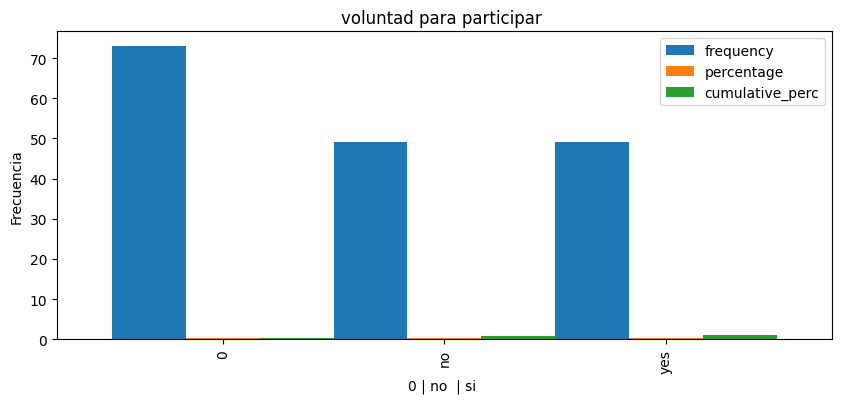

In [211]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('voluntad para participar ')
plt.xlabel('0 | no  | si ')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

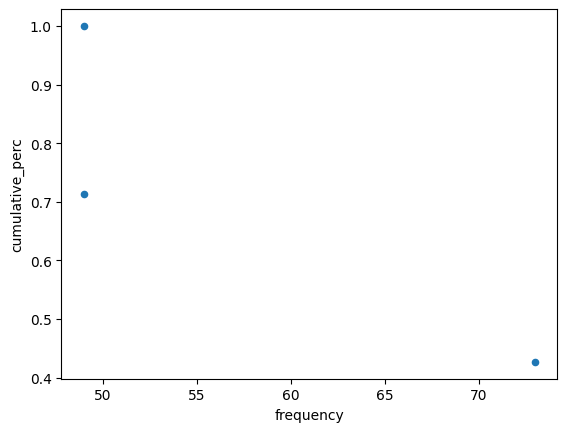

In [212]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='234_willingness_participate_workshop'>

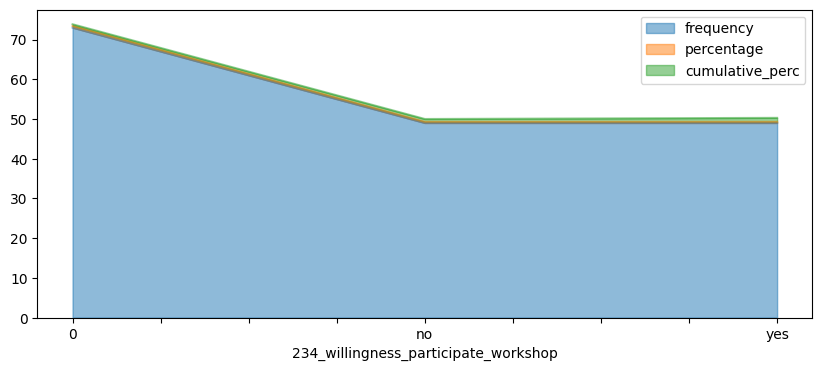

In [213]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: ylabel='frequency'>

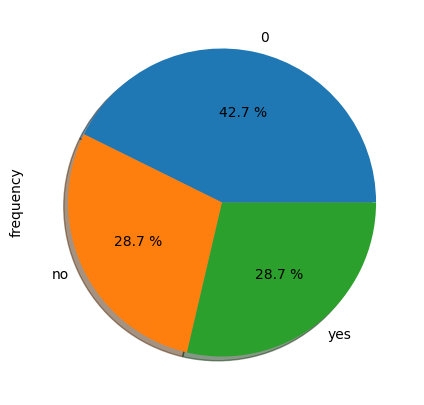

In [214]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

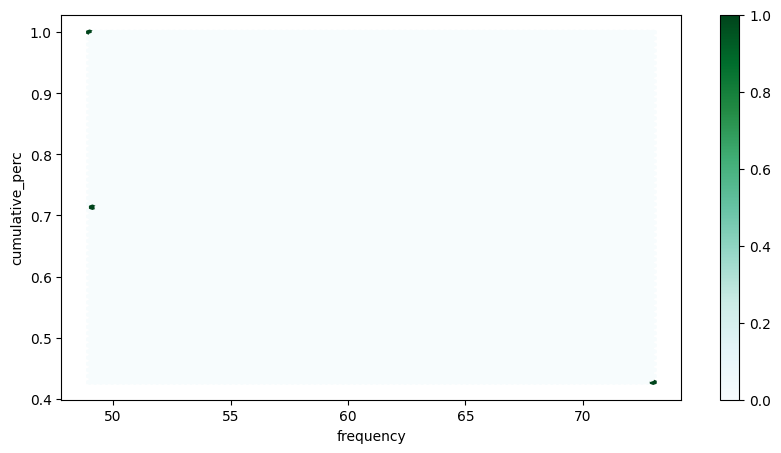

In [215]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))